本文应用3个资产的股票收益率序列：IBM股票、S&P综合指数和可口可乐股票，估计三者之间的DCC-GARCH模型的相关性。

## 加载MTS包

In [3]:
require(MTS)

## 数据处理

### 读取数据

In [4]:
da = read.table("ch7/m-ibmspko-6111.txt", header=T)

### 时间序列格式处理

In [5]:
date <- as.Date(as.character(da$date, format='%Y%m%d'), '%Y%m%d')

### 求对数收益率

In [6]:
rtn = log(da[,2:4]+1)

### 描述性统计

### 平稳性检验

## 一元高斯GARCH(1,1)模型

### 模型估计

In [7]:
m1=dccPre(rtn, include.mean=T,p=0)

Sample mean of the returns:  0.00772774 0.005023909 0.01059521 
Component:  1 
Estimates:  0.000419 0.126739 0.788307 
se.coef  :  0.000162 0.035405 0.055645 
t-value  :  2.593448 3.57973 14.16662 
Component:  2 
Estimates:  9e-05 0.127725 0.836053 
se.coef  :  4.1e-05 0.03084 0.031723 
t-value  :  2.20126 4.141592 26.35486 
Component:  3 
Estimates:  0.000256 0.098705 0.830358 
se.coef  :  8.5e-05 0.022361 0.033441 
t-value  :  3.015321 4.414112 24.83088 


This program fits marginal GARCH models to each component of a vector return series and returns the standardized return series for further analysis. The garchFit command of fGarch package is used.

|返回参数|解释|
|---|---|
|marVol	|A matrix of the volatility series for each return series|
|sresi	|Standardized residual series|
|est	|Parameter estimates for each marginal volatility model|
|se.est	|Standard errors for parameter estimates of marginal volatility models|

对单个序列应用一元高斯GARCH(1,1)模型：
$$
\sigma_{11,t}= 0.000419 + 0.126739a_{1,t-1}^2 + 0.788307\sigma_{11,t-1} \\
\sigma_{22,t}= 9*10^5 + 0.127725a_{2,t-1}^2 + 0.836053\sigma_{22,t-1} \\
\sigma_{33,t}= 0.000256 + 0.098705a_{3,t-1}^2 + 0.830358\sigma_{33,t-1} \\ 
$$
$a$:the innovations  
$\sigma_{ij,t}$:波动率

使用波动率序列，计算边际标准化新息：  
$$
\hat{\eta_t} = (\hat{\eta_{1t}}, \hat{\eta_{2t}},\hat{\eta_{3t}})^{`}， \\
\hat{\eta_{it}}=\hat{a_{it}}/\sqrt{\sigma_{ii,t}}
$$
$\hat{\eta_t}$:边际标准化新息向量

### 绘制波动率

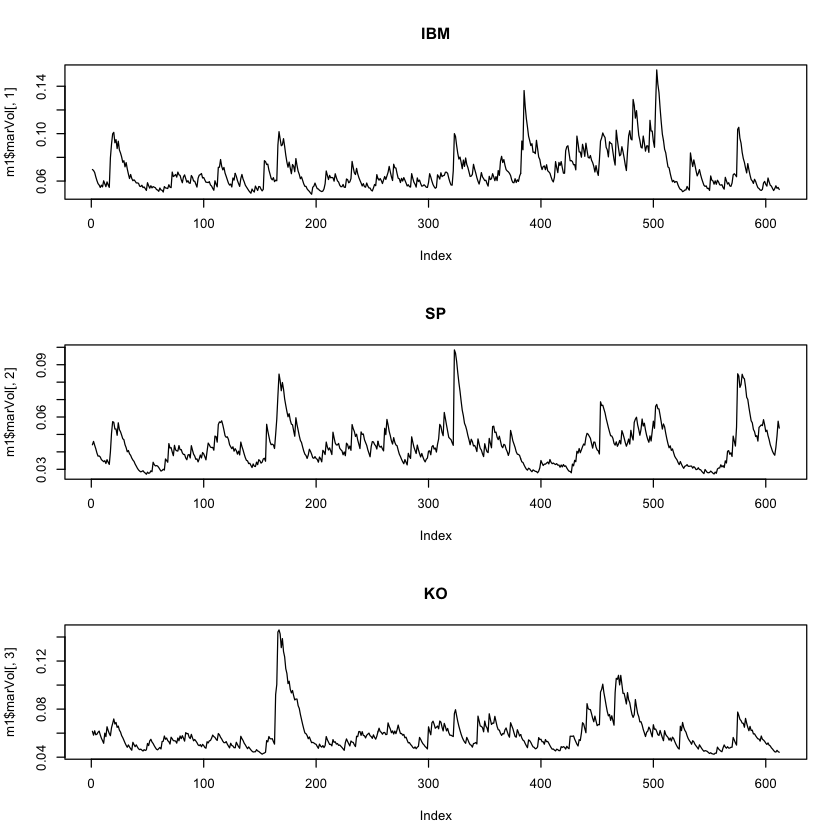

In [8]:
par(mfrow=c(3,1))
plot(m1$marVol[,1], main='IBM', type='l')
plot(m1$marVol[,2], main='SP', type='l')
plot(m1$marVol[,3], main='KO', type='l')

## DCC



Description

Fits a DCC model(Dynamic Cross-Correlation Model) using either multivariate Gaussian or multivariate Student-t innovations. Two types of DCC models are available. The first type is proposed by Engle and the other is by Tse and Tsui. Both models appear in the Journal of Business and Economic Statistics, 2002.

Usage
```R
dccFit(rt, type = "TseTsui", theta = c(0.90, 0.02), 
    ub = c(0.95, 0.049999), lb = c(0.4,0.00001),
    cond.dist = "std", df = 7, m = 0)
```
|Arguments|解释|
|---|---|
|rt	|The T-by-k data matrix of k-dimensional standardized asset returns. Typically, they are the standardized residuals of the command dccPre.|
|type	|A logical switch to specify the type of DCC model. Type="TseTsui" for Tse and Tsui's DCC model. Type = "Engle" for Engle's DCC model. Default is Tse-Tsui model.|
|theta	|The initial parameter values for theta1 and theta2|
|ub	|Upper bound of parameters|
|lb	|Lower bound of parameters|
|cond.dist	|Conditional innovation distribution with std for multivariate Student-t innovations.|
|df	|degrees of freedom of the multivariate Student-t innovations.|
|m	|For Tse and Tsui method only, m denotes the number of returns used in local correlation matrix estimation|

|返回值|解释|
|---|---|
|estimates	|Parameter estimates|
|Hessian	|Hessian matrix of the estimates|
|rho.t	|Time-varying correlation matrices. Each row contains elements of a cross-correlation matrix.|

### TseTsui方法

In [9]:
rtn1=m1$sresi
Vol=m1$marVol
m2=dccFit(rtn1)

Estimates:  0.8087994 0.04027416 7.959064 
st.errors:  0.1491731 0.02259899 1.135874 
t-values:   5.421885 1.782122 7.006998 


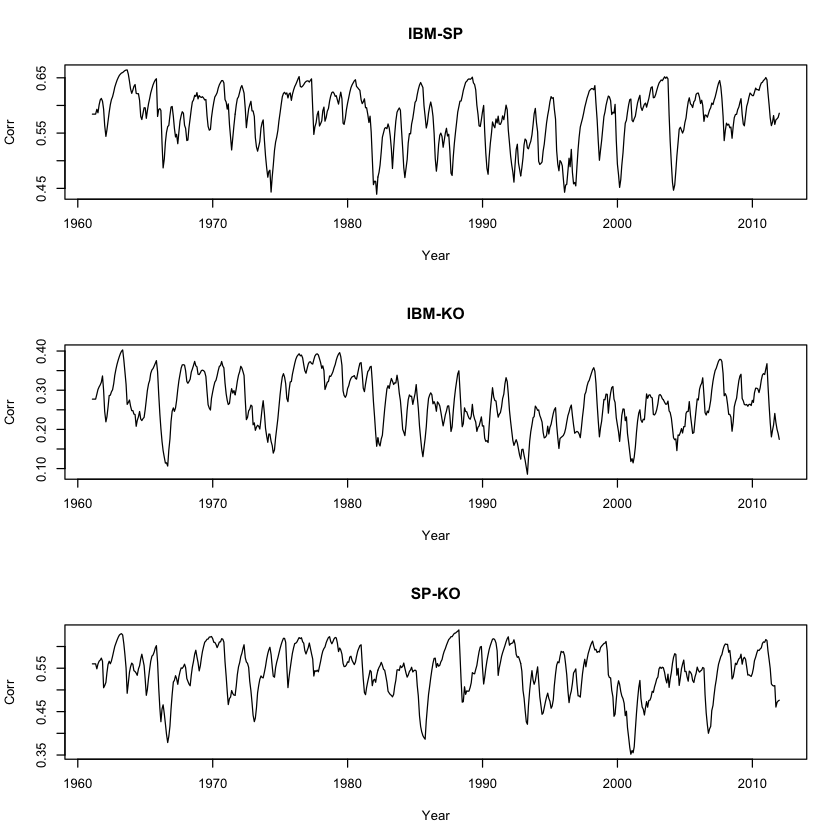

In [10]:
par(mfrow=c(3,1))
plot(date, m2$rho.t[,4], type='l', main='IBM-SP', xlab='Year', ylab='Corr')
plot(date, m2$rho.t[,7],  type='l', main='IBM-KO',xlab='Year', ylab='Corr')
plot(date, m2$rho.t[,8], type='l', main='SP-KO', xlab='Year', ylab='Corr')

### Engle方法

In [11]:
m3=dccFit(m1$sresi,type="Engle")

Estimates:  0.9126534 0.04531519 8.624321 
st.errors:  0.02947897 0.01274031 1.332704 
t-values:   30.95947 3.556835 6.471295 


In [12]:
MCHdiag(rtn1, m3$rho.t)

Test results:  
Q(m) of et: 
Test and p-value:  20.02928 0.02897696 
Rank-based test: 
Test and p-value:  27.60836 0.002084952 
Qk(m) of epsilon_t: 
Test and p-value:  131.9812 0.002626131 
Robust Qk(m):  
Test and p-value:  111.3537 0.06306805 


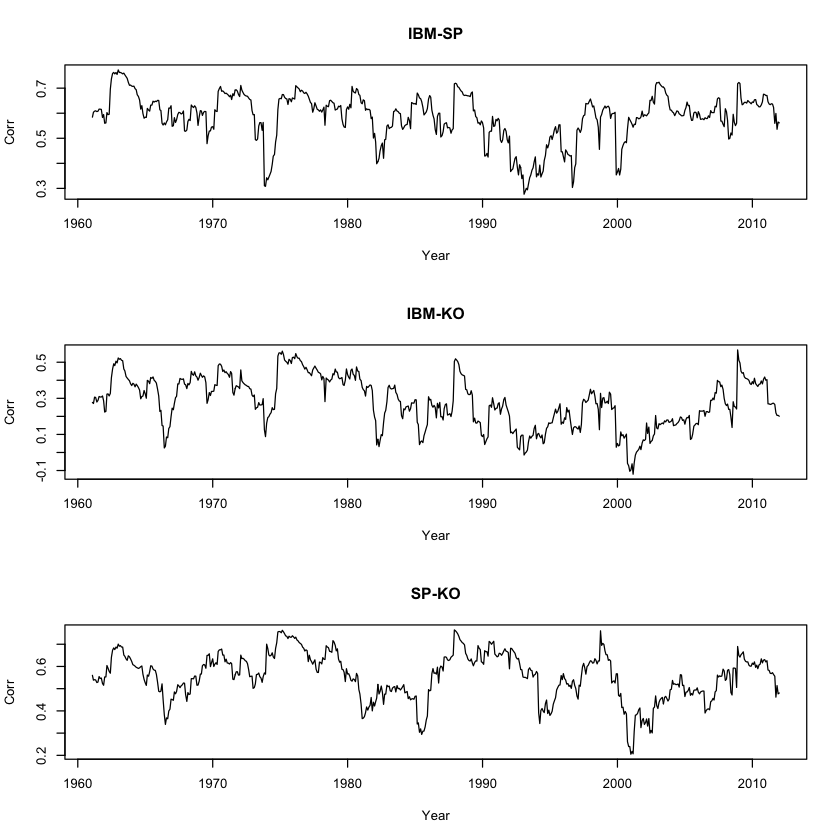

In [13]:
#pdf("image(DCC-IBM-SP-KO).pdf")
par(mfrow=c(3,1))
plot(date, m3$rho.t[,4], type='l', main='IBM-SP', xlab='Year', ylab='Corr')
plot(date, m3$rho.t[,7],  type='l', main='IBM-KO',xlab='Year', ylab='Corr')
plot(date, m3$rho.t[,8], type='l', main='SP-KO', xlab='Year', ylab='Corr')
#dev.off()

In [14]:
# 计算DCC时变相关系数
dcc_corr <- function(rtn){
    m1=dccPre(rtn, include.mean=T,p=0)
    m3=dccFit(m1$sresi,type="Engle")
    corr <- m3$rho.t[,2]
    return(corr)
    }

In [15]:
c<-dcc_corr(rtn)

Sample mean of the returns:  0.00772774 0.005023909 0.01059521 
Component:  1 
Estimates:  0.000419 0.126739 0.788307 
se.coef  :  0.000162 0.035405 0.055645 
t-value  :  2.593448 3.57973 14.16662 
Component:  2 
Estimates:  9e-05 0.127725 0.836053 
se.coef  :  4.1e-05 0.03084 0.031723 
t-value  :  2.20126 4.141592 26.35486 
Component:  3 
Estimates:  0.000256 0.098705 0.830358 
se.coef  :  8.5e-05 0.022361 0.033441 
t-value  :  3.015321 4.414112 24.83088 
Estimates:  0.9126534 0.04531519 8.624321 
st.errors:  0.02947897 0.01274031 1.332704 
t-values:   30.95947 3.556835 6.471295 


In [16]:
plot_corr<-function(date, corr, title){
    plot(date, corr, type='l', main=title, xlab='Year', ylab='Corr')
    }


In [ ]:
da = read.table("ch7/m-ibmspko-6111.txt", header=T)